In [1]:
import sys
import os
sys.path.append(os.path.join(".","nptools"))

#Jseq = "GCTCAGTGGTGTACGGTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTCGACGACGGCGT"
#Pseq = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAATTGAAACTCCGGCTTGTCGACGACGGCGT"

Jonly = "CTGACAGCTAGCTCAGTCCTAGGTATAATGCTAGC" #this one is on the "CC" plasmid
Ponly = "TTTCAATTTAATCATCCGGCTCGTATAATGTGTGGA" #this one is on the "PA" plasmid
bc0 = "AGTAGCACTAGGCAATTTGTTCCGTATTGAAGAGACAGC" #I accidentally put this one on both plasmids, then changed to below


uintf_isce=["TGTGGCCTCTGATTGGTGTCTAGGGATAACAGGGTAAT","uintf_isce"]
attL=["AATGGGCTTGTCGACGACGGCGTGCTCAGTGGTGTACGGTACAAACCTACT","attL"]
bc2 = ["CTAGTTAGATGATAAACTAGTTGCTTGGAACGAACCGG","bc2"] #this one is associated with the "PA" plasmid
bc1 = ["ACCAATGGAGCAGGAATAGTTACTCATCAGCTGGTGAG","bc1"] #this one is usually associated with the "CC" plasmid
attB=["CTCCGGCTTGTCGACGACGGCGTGCTCCGTCGTCAGGATCATACCT","attB"]
U21R=["GCTGGGAGTTCGTAGACGGA","U21R"]
U22R=["AACAAACGCAGAATCCAAGC","U22R"]
t_iscei=["CCTCAGATGACCGATCAGGCATTACCCTGTTATCCCTAGGCA","t_iscei"]



PA_portion="TAAGGGATTTTGGTCATGAGATTATCAAAAAGGATCTTCACCTAGATCCTTTTAAATTAAAAATGAAGTTTTAAATCAATCTAAAGTATATATGA"
CC_portion=""


barcodes = {
    "BC01":"AAGAAAGTTGTCGGTGTCTTTGT",
    "BC02":"TCGATTCCGTTTGTAGTCGTCTG",
    "BC03":"GAGTCTTGTGTCCCAGTTACCAG",
    "BC04":"TTCGGATTCTATCGTGTTTCCCT",
    "BC05":"CTTGTCCAGGGTTTGTGTAACCT",
    "BC06":"TTCTCGCAAAGGCAGAAAGTAGT",
    "BC07":"GTGTTACCGTGGGAATGAATCCT",
    "BC08":"TTCAGGGAACAAACCAAGTTACG",
    "BC09":"AACTAGGCACAGCGAGTCTTGGT",
    "BC10":"AAGCGTTGAAACCTTTGTCCTCT",
    "BC11":"GTTTCATCTATCGGAGGGAATGG",
    "BC12":"CAGGTAGAAAGAAGCAGAATCGG",
    "BC13":"AGAACGACTTCCATACTCGTGTG",
    "BC14":"AACGAGTCTCTTGGGACCCATAG",
    "BC15":"AGGTCTACCTCGCTAACACCACT"
    }
bclist = {}

bcorder = {1:[[uintf_isce],[2]],
            2:[[attL],[3]],
            3:[[bc1,bc2],[2,4]],
            4:[[attB],["x"]],
            }
"""
{1:[[uintf_isce],[2]],
            2:[[attL],[3]],
            3:[[bc1,bc2],[2,6,10]],
            4:[[attB],[5]],
            5:[[U22R,U21R],["x"]],
            6:[[attL],[7]],
            7:[[bc1],[8]],
            8:[[attB],[9]],
            9:[[U21R],["x"]],
            10:[[attL],[11]],
            11:[[bc2],[12]],
            12:[[attB],[13]],
            13:[[U22R],["x"]],
            }
"""


from nanopore_scripts import *
print("done")

done


In [2]:
infile = open(os.path.join(".","data","200131_rec","BC03_output.fastq"),"r")

def countCorrect(seqlist):
    """counts the number of elements that are NOT                    "unidentified",and returns whoever has the most"""
    curbest = 0
    curret = []
    for seq in seqlist:
        count = -seq1.count("unidentified")+len(seq1)
        if(count > curbest):
            curbest = count
            curret = seq
    return seq


sequences = FastqGeneralIterator(infile)
slist = []
rslist = []
for read in sequences:
    rseq = read[1]
    result = findBarcodes(rseq,bcorder,thresh=0.6)
    resultrev = findBarcodes(rc(rseq),bcorder,thresh=0.6)
    bestresult = countCorrect([result,resultrev])

    slist+= [result]
    rslist += [bestresult]

print("done")
#print(slist)
#print(rslist)
'''
print(len(testseq))
y = findBarcodes(testseq,bcorder,thresh=0.6)
print(y)
x = findBarcodes(rc(testseq),bcorder,thresh=0.6)
print(x)
#'''

done


'\nprint(len(testseq))\ny = findBarcodes(testseq,bcorder,thresh=0.6)\nprint(y)\nx = findBarcodes(rc(testseq),bcorder,thresh=0.6)\nprint(x)\n#'

22227
22227
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


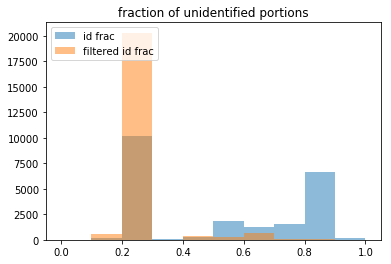

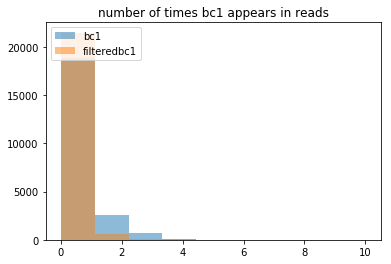

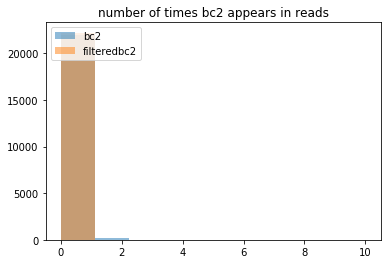

In [7]:
import matplotlib.pyplot as plt
import numpy as np

print(len(slist))
print(len(rslist))
scount = []
bc1ct1 = []
bc2ct1 = []
for unit in slist:
    scount+=[float(unit.count("unidentified"))/len(unit)]
    bc1ct1 +=[unit.count("bc1")]
    bc2ct1 +=[unit.count("bc2")]

rscount = []
bc1ct2 = []
bc2ct2 = []
for unit in rslist:
    rscount+=[float(unit.count("unidentified"))/len(unit)]
    bc1ct2 +=[unit.count("bc1")]
    bc2ct2 +=[unit.count("bc2")]
plt.figure()

bins = np.linspace(0, 1.0, 11)
print(bins)
plt.title("fraction of unidentified portions")
plt.hist(scount, bins, alpha=0.5, label='id frac')
plt.hist(rscount, bins, alpha=0.5, label='filtered id frac')
plt.legend(loc='upper left')

plt.figure()
bins = np.linspace(0, 10.0,10)
plt.title("number of times bc1 appears in reads")
plt.hist(bc1ct1, bins, alpha=0.5, label='bc1')
plt.hist(bc1ct2, bins, alpha=0.5, label='filteredbc1')
plt.legend(loc='upper left')

plt.figure()
plt.title("number of times bc2 appears in reads")
plt.hist(bc2ct1, bins, alpha=0.5, label='bc2')
plt.hist(bc2ct2, bins, alpha=0.5, label='filteredbc2')
plt.legend(loc='upper left')



plt.show()


#plt.hist(scount)
#plt.hist(rscount)

In [3]:
[1,2,3,4].count(4)

1